1)installing packages

In [1]:
%pip install numpy pandas matplotlib scikit-learn tensorflow


  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.8/331.8 MB 4.8 MB/s eta 0:01:09
   ---------------------------------------- 1.6/331.8 MB 4.7 MB/s eta 0:01:11
   ---------------------------------------- 2.6/331.8 MB 4.6 MB/s eta 0:01:13
   ---------------------------------------- 3.7/331.8 MB 4.4 MB/s eta 0:01:14
    --------------------------------------- 4.5/331.8 MB 4.4 MB/s eta 0:01:15
    --------------------------------------- 5.5/331.8 MB 4.4 MB/s eta 0:01:14
    --------------------------------------- 6.3/331.8 MB 4.4 MB/s eta 0:01:14
    --------------------------------------- 7.3/331.8 MB 4.4 M

Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models


Load Dataset

In [3]:
df = pd.read_csv(r'C:\Users\demit\Desktop\EM07_QuantumByte\AI Task\Task 01 – Heart Attack Risk Prediction (Classification)\Heart_Attack_training_dataset.csv')
df.head()  # View first rows


,patient_id,age,sex,chol,bp,hr,diabetes,family_history,smoking,obesity,...,sedentary_hr,income,bmi,triglycerides,phys_act_days,sleep_hr,country,continent,hemisphere,heart_attack_risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Data Preprocessing
Parse blood pressure (bp)

Encode categorical data

Fill missing values

In [7]:
# Updated categorical columns matching your dataset:
cat_cols = ['sex', 'diet', 'smoking', 'diabetes', 'family_history', 'prev_heart_prob',
            'med_use', 'obesity', 'alcohol', 'country', 'continent', 'hemisphere']

# Fill missing values and encode categorical features safely:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:
        print(f"Warning: Column '{col}' not found. Skipping encoding.")

# Fill missing numerical columns with median:
num_cols = ['age', 'chol', 'triglycerides', 'bmi', 'bp_systolic', 'bp_diastolic', 'hr', 
            'exercise_hr_wk', 'stress_lvl', 'sedentary_hr', 'phys_act_days', 'sleep_hr', 'income']

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
    else:
        print(f"Warning: Numerical column '{col}' not found, skipping fillna.")

# Scale numerical features:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
existing_num_cols = [col for col in num_cols if col in df.columns]
df[existing_num_cols] = scaler.fit_transform(df[existing_num_cols])


C:\Users\demit\AppData\Local\Temp\ipykernel_36052\2030492259.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\demit\AppData\Local\Temp\ipykernel_36052\2030492259.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [5]:
print(df.columns)


Index(['patient_id', 'age', 'sex', 'chol', 'hr', 'diabetes', 'family_history',
       'smoking', 'obesity', 'alcohol', 'exercise_hr_wk', 'diet',
       'prev_heart_prob', 'med_use', 'stress_lvl', 'sedentary_hr', 'income',
       'bmi', 'triglycerides', 'phys_act_days', 'sleep_hr', 'country',
       'continent', 'hemisphere', 'heart_attack_risk', 'bp_systolic',
       'bp_diastolic'],
      dtype='object')


Prepare Data for Modeling
Split processed dataset into training and validation sets (e.g., 80% train, 20% validation).

Reshape  features into 3D tensors to fit CNN input requirements: (samples, features, 1).

Make sure to stratify, preprocess, and correctly reshape for CNN input.

Fix the shape used for reshaping (use [0] and [1] dimensions).

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['patient_id', 'heart_attack_risk']).values

y = df['heart_attack_risk'].values

# Stratified split to keep class distribution balanced
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Reshape for 1D CNN: (samples, features, channels=1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))



Step 6: Build the CNN Model Architecture
Change:

Add higher dropout, consider kernel regularization, keep architecture simple.

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu',
                  input_shape=(X_train.shape[1], 1)),
    layers.BatchNormalization(),                 # BatchNorm after Conv layer
    layers.MaxPooling1D(pool_size=2),
    
    layers.Conv1D(64, kernel_size=3, activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    
    layers.Flatten(),
    
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),                         # Dropout layer for regularization
    
    layers.Dense(1, activation='sigmoid')
])

model.summary()



c:\Users\demit\anaconda3\envs\ml-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 23, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 23, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 9, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 9, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,233 (90.75 KB)

 Trainable params: 23,041 (90.00 KB)

 Non-trainable params: 192 (768.00 B)

7: Compile the Model
Use 'adam' optimizer,

'binary_crossentropy' loss function,

Metrics: Recall (important), and accuracy.

Standard compilation with focus on recall.

In [44]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), 'accuracy'])



Step 8: Train the Model (With Early Stopping)
Change:
trained the model for 45 epchos for better recall without overfitting 


In [ ]:
history = model.fit(X_train, y_train, epochs=45, batch_size=32, validation_data=(X_val, y_val), verbose=2)


Epoch 1/40
200/200 - 1s - 5ms/step - accuracy: 0.7688 - loss: 0.5297 - recall_4: 0.4719 - val_accuracy: 0.5932 - val_loss: 0.9055 - val_recall_4: 0.2281
Epoch 2/40
200/200 - 1s - 5ms/step - accuracy: 0.7706 - loss: 0.5233 - recall_4: 0.4938 - val_accuracy: 0.5970 - val_loss: 0.9491 - val_recall_4: 0.1770
Epoch 3/40
200/200 - 1s - 6ms/step - accuracy: 0.7677 - loss: 0.5228 - recall_4: 0.4916 - val_accuracy: 0.6114 - val_loss: 0.9222 - val_recall_4: 0.1934
Epoch 4/40
200/200 - 1s - 5ms/step - accuracy: 0.7653 - loss: 0.5240 - recall_4: 0.4719 - val_accuracy: 0.6014 - val_loss: 0.9498 - val_recall_4: 0.1953
Epoch 5/40
200/200 - 1s - 5ms/step - accuracy: 0.7626 - loss: 0.5277 - recall_4: 0.4747 - val_accuracy: 0.6039 - val_loss: 0.9409 - val_recall_4: 0.1971
Epoch 6/40
200/200 - 1s - 5ms/step - accuracy: 0.7749 - loss: 0.5236 - recall_4: 0.4920 - val_accuracy: 0.6045 - val_loss: 0.9629 - val_recall_4: 0.1423
Epoch 7/40
200/200 - 1s - 6ms/step - accuracy: 0.7697 - loss: 0.5281 - recall_4: 0

In [49]:
print(history.history.keys())



dict_keys(['accuracy', 'loss', 'recall_4', 'val_accuracy', 'val_loss', 'val_recall_4'])


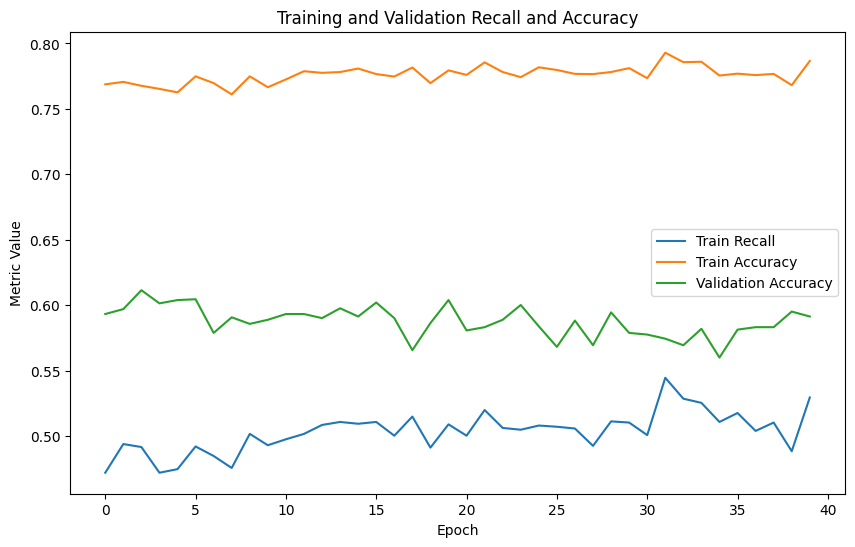

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['recall_4'], label='Train Recall')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Training and Validation Recall and Accuracy')
plt.legend()
plt.show()


Report training performance metrics:

Accuracy

Precision, Recall, F1-score

ROC-AUC Score

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict probabilities on training data
y_train_pred_probs = model.predict(X_train).flatten()

# Convert probabilities to class labels using 0.5 threshold
y_train_pred = (y_train_pred_probs >= 0.5).astype(int)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_probs)

print("Training Set Performance Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")
print(f"ROC-AUC Score: {train_roc_auc:.4f}")


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training Set Performance Metrics:
Accuracy: 0.8578
Precision: 0.9484
Recall: 0.6203
F1-Score: 0.7500
ROC-AUC Score: 0.9480


Step 10: Predict on Test Dataset and Submit Predictions
Now that your CNN is trained to avoid overfitting, follow these final steps:

a. Preprocess Test Data

Ensure all test preprocessing matches training (label encoding, scaling, reshaping). Use the same encoders and scalers fit on training data.

In [65]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Load your trained model (ensure model is loaded or accessible as 'model')
# Example: model = keras.models.load_model('your_model.h5')

# Load the test dataset CSV - update path if required
test_df = pd.read_csv(r"C:\Users\demit\Desktop\EM07_QuantumByte\AI Task\Task 01 – Heart Attack Risk Prediction (Classification)\Hear_Attack_evaluation_dataset.csv")

# List of categorical columns (adjust as per your training)
cat_cols = ['sex', 'diabetes', 'family_history', 'smoking', 'obesity',
            'alcohol', 'diet', 'med_use', 'stress_lvl', 'country', 'continent', 'hemisphere']

# Step 1: Handle missing values and encode categorical columns (same treatment as training)
for col in test_df.columns:
    if col != 'patient_id':
        if test_df[col].isnull().sum() > 0:
            if test_df[col].dtype in ['float64', 'int64']:
                test_df[col].fillna(test_df[col].median(), inplace=True)
            else:
                test_df[col].fillna('Unknown', inplace=True)

for col in cat_cols:
    if col in test_df.columns:
        le = LabelEncoder()
        test_df[col] = le.fit_transform(test_df[col].astype(str))

# Load scaler fitted on your training numeric features
scaler = joblib.load('scaler.save')  # ensure you saved scaler during training

# Numeric columns used in training preprocessing
numeric_cols = ['age', 'chol', 'bp', 'hr', 'exercise_hr_wk', 'prev_heart_prob',
                'sedentary_hr', 'income', 'bmi', 'triglycerides', 'phys_act_days', 'sleep_hr']

# Convert data and fill missing if any remain
for col in numeric_cols:
    if col in test_df.columns:
        test_df[col] = pd.to_numeric(test_df[col], errors='coerce')
        test_df[col].fillna(test_df[col].median(), inplace=True)

# Scale numeric columns using loaded scaler
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

# Prepare features for prediction (drop patient_id column)
X_test = test_df.drop(columns=['patient_id']).values
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # Reshape for CNN input

# Predict probabilities with your trained model
test_pred_probs = model.predict(X_test).flatten()

# Threshold probabilities to class labels (0 or 1)
test_pred_labels = (test_pred_probs >= 0.5).astype(int)

# Prepare submission DataFrame with required columns
submission = pd.DataFrame({
    'patient_id': test_df['patient_id'],
    'heart_attack_risk': test_pred_labels
})

# Save submission CSV file matching required format
submission.to_csv('EN07_QuantumByte_Task1_Predictions.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'scaler.save'

In [59]:
print(test_df.columns)


Index(['patient_id', 'age', 'sex', 'chol', 'bp', 'hr', 'diabetes',
       'family_history', 'smoking', 'obesity', 'alcohol', 'exercise_hr_wk',
       'diet', 'prev_heart_prob', 'med_use', 'stress_lvl', 'sedentary_hr',
       'income', 'bmi', 'triglycerides', 'phys_act_days', 'sleep_hr',
       'country', 'continent', 'hemisphere'],
      dtype='object')


In [ ]:
# Model prediction - returns probabilities
pred_probs = model.predict(X_test).flatten()
pred_labels = (pred_probs >= 0.5).astype(int)

submission = pd.DataFrame({
    'patient_id': test_df['patient_id'],
    'heart_attack_risk': pred_labels
})

# Save with required format and file name
submission.to_csv('TeamCodeTeamNameTask1Predictions.csv', index=False)
